# Standard imports

In [ ]:
import numpy as np
import scipy.stats
import pandas as pd

In [ ]:
import matplotlib;
import matplotlib.pyplot as plt;

from IPython import display;
from ipywidgets import interact, widgets;

%matplotlib inline

Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 15 ("                               'fc4f30', ")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 16 ("                               'e5ae38',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 17 ("                               '6d904f',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 18 ("                               '8b8b8b',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 19 ("                               '810f7c'])")
Bad value in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 14 ("axes.prop_cycle: cycler(color=['008fd5', "): Key axes.prop_cycle: 'cycler(color=['008fd5',' is not a valid cycler construction: unexpected EOF while parsing (<unknown>, 

In [ ]:
import re
import mailbox
import csv

In [ ]:
gapminder = pd.read_csv('data/gapminder.csv')
gapminder.info

<bound method DataFrame.info of            country  year  region  population  life_expectancy  age5_surviving  \
0      Afghanistan  1800    Asia   3280000.0            28.21          53.142   
1      Afghanistan  1810    Asia   3280000.0            28.11          53.002   
2      Afghanistan  1820    Asia   3323519.0            28.01          52.862   
3      Afghanistan  1830    Asia   3448982.0            27.90          52.719   
4      Afghanistan  1840    Asia   3625022.0            27.80          52.576   
...            ...   ...     ...         ...              ...             ...   
14735     Zimbabwe  2011  Africa  14255592.0            51.60          90.800   
14736     Zimbabwe  2012  Africa  14565482.0            54.20          91.330   
14737     Zimbabwe  2013  Africa  14898092.0            55.70          91.670   
14738     Zimbabwe  2014  Africa  15245855.0            57.00          91.900   
14739     Zimbabwe  2015  Africa  15602751.0            59.30          92.040

In [ ]:
gapminder.loc[0:12000:1200] # overview

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1200,Belarus,2001,Europe,9891535.0,68.00,98.700,1.22,7704.0,21.092402
2400,Canada,1986,America,26181342.0,76.46,99.060,1.59,29482.0,80.717317
3600,Czech Republic,1973,Europe,9936604.0,70.33,97.565,2.21,16382.0,44.851472
4800,Gambia,1958,Africa,344265.0,34.86,62.450,5.48,1120.0,3.066393
6000,Indonesia,1880,Asia,30212871.0,30.00,55.621,6.07,1088.0,2.978782
7200,Kuwait,2009,Asia,2881243.0,77.40,98.890,2.68,81025.0,221.834360
8400,Mali,1994,Africa,9383608.0,51.20,75.800,6.97,1087.0,2.976044
9600,New Zealand,1979,Asia,3135453.0,73.18,98.390,2.24,21144.0,57.889117
10800,Romania,1964,Europe,19207098.0,67.96,92.280,1.95,7512.0,20.566735


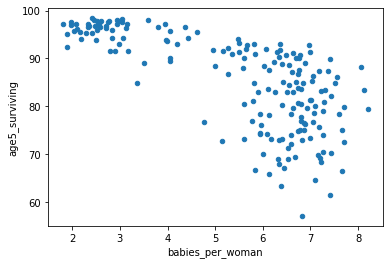

In [ ]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman', 'age5_surviving'); # boolean index year & plot scatter x,y

# Interactive scatterplot

In [8]:
def plotyear(year):

    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    data.plot.scatter('babies_per_woman', 'age5_surviving', s= area, c=colors, linewidths=1, edgecolors='k', figsize=(12, 9))


    plt.axis(ymin=50, ymax=105, xmax=8)
    plt.xlabel('babies per woman')
    plt.ylabel('% children alive at 5')

In [9]:
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1965)); 

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

In [ ]:
china1965 = pd.read_csv('data/income-1965-china.csv')
china2015 = pd.read_csv('data/income-2015-china.csv')
usa1965 = pd.read_csv('data/income-1965-usa.csv')
usa2015 = pd.read_csv('data/income-2015-usa.csv')

In [ ]:
china1965.info()

In [ ]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
# income has the quality, that a change in income (per day in $)
# becomes recognizable only  when income doubles
# from 1 to 2 $ or from a 1000 to 2000 but not from 1000 to 1010
# thus the log_10 scale
china1965.head()
usa2015.head()

,income,log10_income
0,72.550746,1.860642
1,47.333869,1.675172
2,65.866942,1.818668
3,93.093078,1.968917
4,15.194904,1.181698


# descriptive statistics

In [ ]:
china1965.min()
china1965.max()
china1965.mean()
china1965.quantile([0.25, 0.75])
china1965.median() # the same as  .quantile(0.5)
china1965.quantile(0.5)
scipy.stats.percentileofscore(china1965.income, 1.5) # what % of incomes lie below 1.5$
china1965.describe()
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


# boxplots

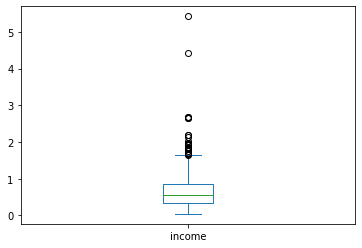

In [ ]:
china1965.income.plot(kind='box');

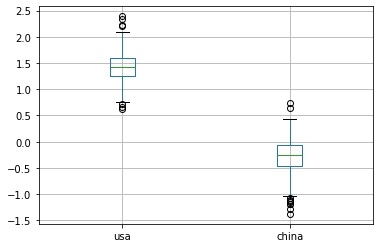

In [ ]:
# for 2 boxplots in one picture a df is needed
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot();

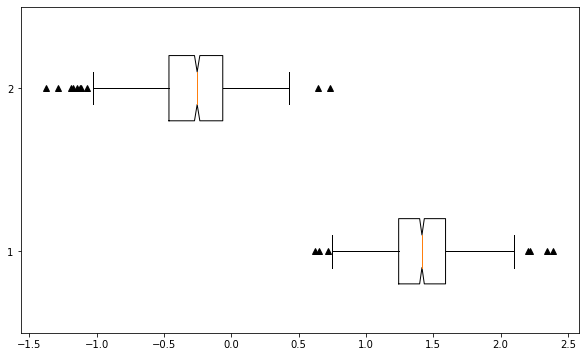

In [ ]:
# more options with matplot boxplots
# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py
bdata = pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income})
fig, ax = plt.subplots(figsize=(10,6))
plt.boxplot(bdata, notch=1, sym='k^', vert=0, widths=0.4);

# histogram & density curve

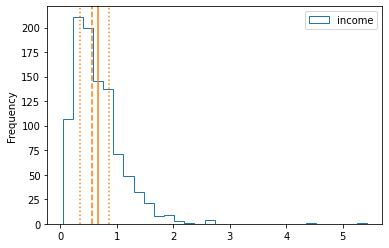

In [ ]:
china1965.income.plot(kind='hist', histtype='step', bins=30); # histogram, step means figure is not filled with color
plt.axvline(china1965.income.mean(), c='C1');
plt.axvline(china1965.income.median(), c='C1', linestyle='--');
plt.axvline(china1965.income.quantile(0.25), c='C1', linestyle=':');
plt.axvline(china1965.income.quantile(0.75), c='C1', linestyle=':');
plt.legend()

# density curve
- the density is just an approximation of the entire distribution
- the approx is depended of the sale of the smoothing which is chosen automatically
- but we can set the smoothing with bw_method low = less smooth / high 0 very smooth
- hist needs to be normalized meaning that the area under hist=1

In [ ]:
china1965.income.plot(kind='hist', histtype='step', bins=30, density=True);
china1965.income.plot.density(bw_method=0.5)

plt.axis(xmin=0, xmax=3)

NameError: name 'china1965' is not defined

# logarithmic scale

In [19]:
np.log10([0.25, 0.5, 1, 2, 3, 4, 8, 16, 32, 64])

array([-0.60205999, -0.30103   ,  0.        ,  0.30103   ,  0.47712125,
        0.60205999,  0.90308999,  1.20411998,  1.50514998,  1.80617997])

Text(0.5, 1.0, 'Income 1965 - log scale')

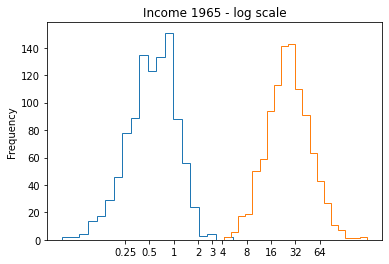

In [94]:
china1965.log10_income.plot.hist(histtype='step', bins=20)
usa1965.log10_income.plot.hist(histtype='step', bins=20)

# use logarithmic scale on the x-axis
levels = [0.25, 0.5 , 1, 2, 3,  4, 8, 16, 32, 64];
plt.xticks(np.log10(levels), levels); # xticks(position, label_name)
plt.title('Income 1965 - log scale')

Text(0.5, 1.0, 'Income 2015 - log scale')

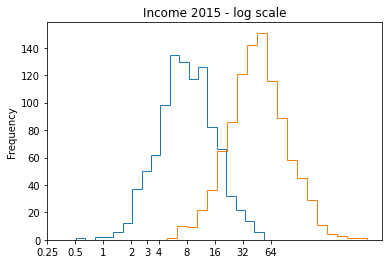

In [96]:
china2015.log10_income.plot.hist(histtype='step', bins=20)
usa2015.log10_income.plot.hist(histtype='step', bins=20)

levels = [0.25, 0.5, 1, 2, 3, 4, 8, 16, 32, 64]
plt.xticks(np.log10(levels), levels);
plt.title('Income 2015 - log scale')

# weighted histograms

In [97]:
gapminder = pd.read_csv('data/gapminder.csv')

In [98]:
# extract population size 
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [99]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [100]:
# population / observations = weights
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

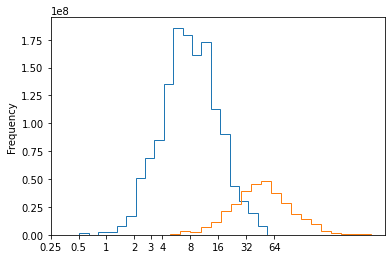

In [108]:
# now every observation accounts for 1/1000 of the respective population
fig, ax = plt.subplots()

china2015.log10_income.plot.hist(histtype='step', bins=20, weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step', bins=20, weights=usa2015.weight)

# labels in $ per day, their position in log scale
levels = [0.25, 0.5, 1, 2, 3, 4, 8, 16, 32, 64]
plt.xticks(np.log10(levels), levels);

# Plots of two quantitative variables
- relations between two variables 
- variance of response variable as a functional variation of the explanatory variable

In [109]:
gapminder = pd.read_csv('data/gapminder.csv')

In [28]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


## date as explanatory variable - timeseries

In [29]:
italy = gapminder.query('country == "Italy"')
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


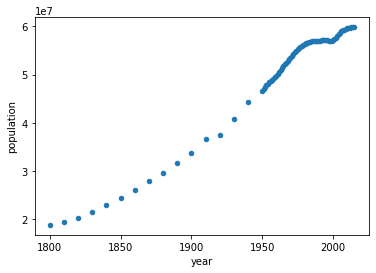

In [30]:
italy.plot.scatter('year', 'population');

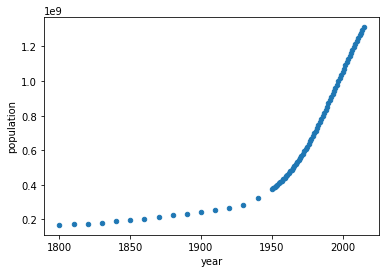

In [31]:
gapminder.query('country == "India"').plot.scatter( 'year', 'population');

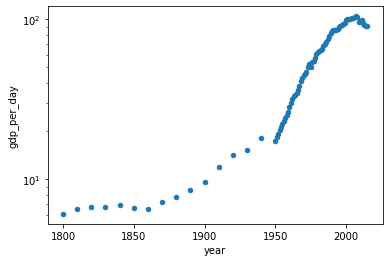

In [32]:
italy.plot.scatter('year', 'gdp_per_day', logy=True); # log y-scale, since income only makes a difference when doubled

## life_expectancy vs income

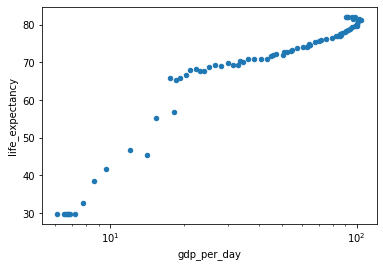

In [33]:
italy.plot.scatter('gdp_per_day', 'life_expectancy', logx=True); # income goes in x and log-scale with it

## show decades as dots

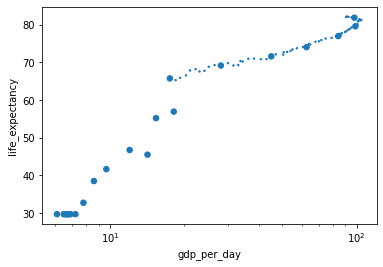

In [34]:
# mark decades with different dots large dot (30) for decades (dates which are factors of 10)
size = np.where(italy.year % 10 == 0, 30, 2)
italy.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size);

In [35]:
size # np.where(logic, x, y) creates an array where logic True is x where False y

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  2,
        2,  2,  2,  2,  2,  2,  2,  2, 30,  2,  2,  2,  2,  2,  2,  2,  2,
        2, 30,  2,  2,  2,  2,  2,  2,  2,  2,  2, 30,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 30,  2,  2,  2,  2,  2,  2,  2,  2,  2, 30,  2,  2,
        2,  2,  2,  2,  2,  2,  2, 30,  2,  2,  2,  2,  2])

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

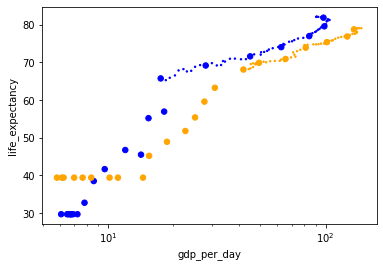

In [36]:
data = gapminder.query('(country == "Italy") or (country == "United States")')
size = np.where(data.year % 10 == 0, 30, 2)
color = np.where(data.country == 'Italy', 'blue', 'orange')
data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size, c= color)

## add time line

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

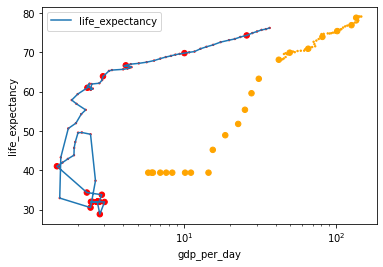

In [37]:
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0, 30, 2)
color = np.where(data.country == 'China', 'red', 'orange')

# save scatter plot to matplot object ax and pass it to line() to combine the plots 
ax = data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=size, c=color)

data[data.country == 'China'].plot.line(x='gdp_per_day', y='life_expectancy', ax= ax)

# visualize 3+ variables

In [38]:
gapminder = pd.read_csv('../../data/gapminder.csv')

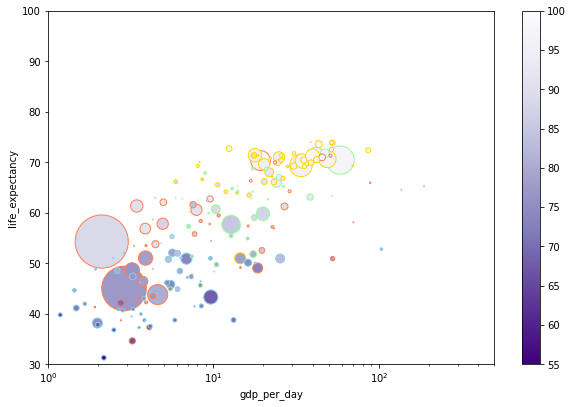

In [39]:
def plotyear(year):
    # sort data ascending by population to sit larger dots in the back
    data = gapminder[gapminder.year == year].sort_values('population', ascending= False)
    area  = 4e-6 * data.population # population as size
    color= data.age5_surviving # child survibal as color of dots
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

    data.plot.scatter( 'gdp_per_day', 'life_expectancy', logx=True, s=area, 
        # 'colormap_r' reverses the scale; min/max of scale
        c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
        # fineblack line around dots; 'sharex' forces the x-lable to show up
        linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(10, 6.5))  

    plt.axis(xmin=1, xmax=500, ymin=30, ymax=100)

plotyear(1965)

# interactive selection

In [110]:
interact(plotyear, year=range(1965, 2016, 10));

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

In [41]:
gapminder[gapminder.year == 2015].population.sum() # total population in 2015

7292414176.0

In [42]:
gapminder[gapminder.year == 2015].groupby('region').population.sum() # population 2015 by continent

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

# income levels

In [43]:
def plotyear(year):
    # sort data ascending by population to sit larger dots in the back
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 4e-6 * data.population  # population as size
    color = data.age5_surviving  # child survibal as color of dots
    edgecolor = data.region.map({ 'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral' })

    ax = data.plot.scatter( 'gdp_per_day', 'life_expectancy', logx=True, s=area,
        # 'colormap_r' reverses the scale; min/max of scale
        c=color, colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
        # fineblack line around dots; 'sharex' forces the x-lable to show up
        linewidths=1, edgecolors=edgecolor, sharex=False, figsize=(12, 8.5))
        
    ax.text(0.12, 0.915, 'income \nlevel 1', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize =14, fontweight='bold', color='green')
    ax.text(0.34, 0.9, 'level 2', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize =14, fontweight='bold', color='green')
    ax.text(0.56, 0.9, 'level 2', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize =14, fontweight='bold', color='green')
    ax.text(0.83, 0.9, 'level 3', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize =14, fontweight='bold', color='green')

    # vertical lines between income levels
    for level in [4, 16, 64]:
        plt.axvline(level, linestyle=':', color='k')

    plt.axis(xmin=1, xmax=500, ymin=30, ymax=100)

In [44]:
interact(plotyear, year=range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [45]:
# add log gdp to the df
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])

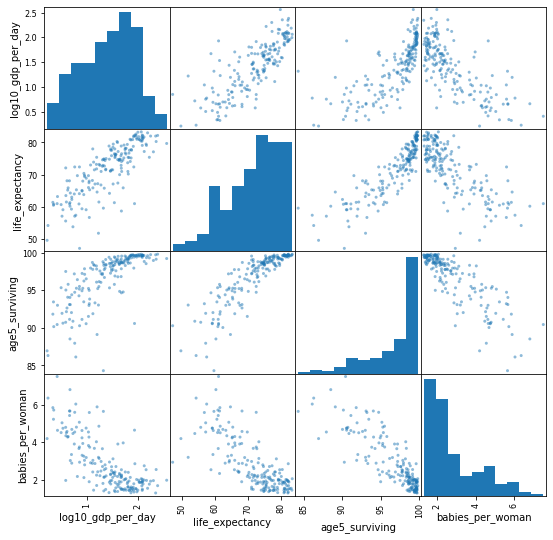

In [46]:
data = gapminder.loc[gapminder.year == 2015, 
    ['log10_gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]

pd.plotting.scatter_matrix(data, figsize=(9, 9));

# categorical data

In [120]:
smoking = pd.read_csv('data/whickham.csv')

In [121]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [122]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [123]:
pd.DataFrame(smoking.smoker.value_counts()) # df with count of categories

,smoker
No,732
Yes,582


In [124]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [125]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True)) # fraction/ proportion

,outcome
Alive,0.719178
Dead,0.280822


In [126]:
bysmoker = smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [127]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [128]:
# table has two indexes
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [129]:
# move one index to columns - unstack
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


## stratification - to control for age 

In [130]:
# cut - cuts the data at the given points
smoking['ageGroup'] = pd.cut(smoking.age, [0, 30 ,40, 53, 64], labels=['0-30', '30-40', '40-53', '53-64'])
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): ['0-30' < '30-40' < '40-53' < '53-64']

In [131]:
# NaN comes up for persons over 64
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [132]:
# grouped by age and smoker we show proportion of Alive
byage = smoking.groupby(['ageGroup', 'smoker']).outcome.value_counts(normalize=True)
# Dead can be dropped since they are 1-Alive
byage.unstack() .drop('Dead', axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

This is an example of **Simpson's paradox**, which also goes by several other names, is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. 

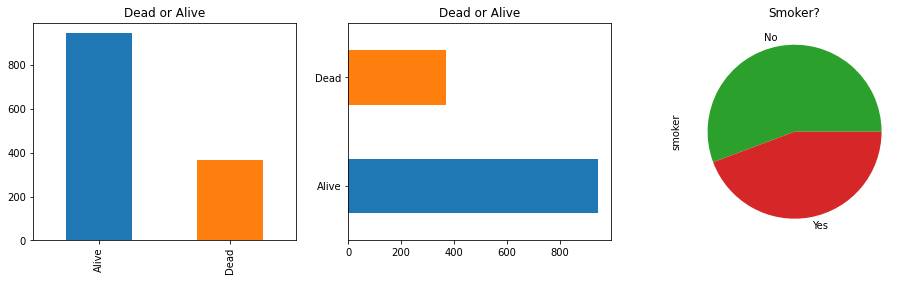

In [133]:
plt.figure(figsize=(16,4));
# 'kind' could be changed to 'barh' or 'pie' with 'pie' 'color' becomes 'colors'
plt.subplot(1, 3, 1); smoking.outcome.value_counts().plot(kind='bar', color=['C0', 'C1']); plt.title('Dead or Alive');
plt.subplot(1, 3, 2); smoking.outcome.value_counts().plot(kind='barh', color=['C0', 'C1']); plt.title('Dead or Alive');
plt.subplot(1, 3, 3); smoking.smoker.value_counts().plot(kind='pie', colors=['C2', 'C3']); plt.title('Smoker?');

In [134]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

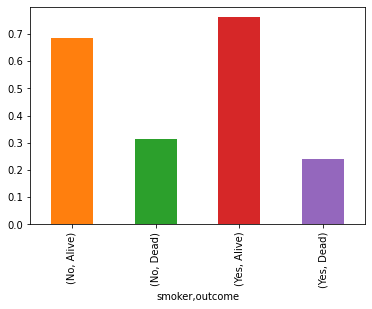

In [135]:
bysmoker.plot(kind='bar', color=['C1', 'C2', 'C3', 'C4']); # labels are multi-indexed

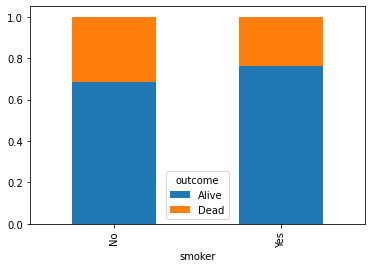

In [137]:
# unstack df but stack bars
# looks suspiciously as if smoking prolongs lifetime
bysmoker.unstack().plot(kind='bar', stacked=True);

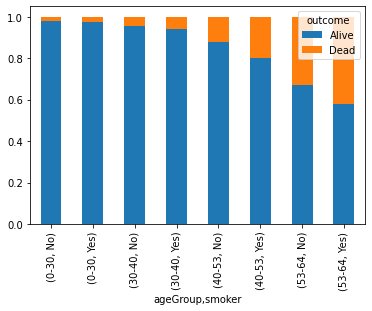

In [138]:
# split by age groups we have a more informing plot
byage.unstack().plot(kind='bar', stacked=True);

In [148]:
pd.DataFrame(byage).unstack()

outcome          
outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-53    No      0.876106  0.123894
         Yes     0.802395  0.197605
53-64    No      0.669291  0.330709
         Yes     0.580645  0.419355

In [155]:
# to drop 'Dead' it first has to go in the columns with unstack 
pd.DataFrame(byage.unstack()).drop('Dead', axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [139]:
# Alive is enough to know; smoker(yes, no) goes into the columns
byage.unstack().drop('Dead', axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [140]:
# clean the messy labels by building a new df 
byage2 = byage.unstack().drop('Dead', axis=1).unstack()
byage2.columns = ['No', 'Yes']
byage2.columns.name = 'smoker'
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


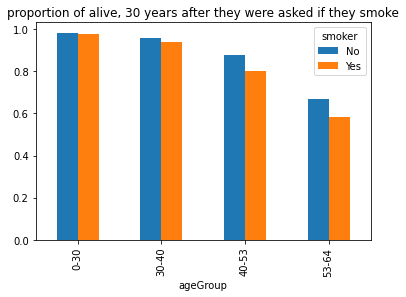

In [142]:
byage2.plot(kind='bar'); plt.title('proportion of alive, 30 years after they were asked if they smoke');

# email analysis

In [94]:
import pandas  as pd
messages = pd.read_csv('data/mbox-anonymized.csv')

In [95]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


In [96]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [97]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

# regular expressions
\. matches any character and + matches one more of what came before

In [98]:
re.search('<(.+)>', messages['from'][0]) # finds one or more charcaters between <>

<re.Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [99]:
re.search('<(.+)>', messages['from'][0]).group(0) # whole match of the  search

'<Michele.Vallisneri@jpl.nasa.gov>'

In [100]:
re.search('<(.+)>', messages['from'][0]).group(1) # inner group of the search

'Michele.Vallisneri@jpl.nasa.gov'

In [101]:
def clean_adress(raw):
    match = re.search('<(.+)>', raw)

    if match is None:
        return raw
    else:
        return match.group(1)

In [102]:
clean_adress(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [103]:
messages['from'] = messages['from'].apply(clean_adress)

TypeError: expected string or bytes-like object

# debug

In [ ]:
%debug # up > print(raw) >quit

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> quit


In [104]:
messages['from'] = messages['from'].dropna().apply(clean_adress) # drop NaN and  apply method 
messages['to'] = messages['to'].dropna().apply(clean_adress) 

In [105]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


# datetime

In [106]:
messages['date'][0] # dates are currently strings 

'Mon, 27 Nov 2017 14:18:46 -0800'

In [107]:
# pd.to_datetime( messages['date'][0]).tz_localize('UTC').tz_convert('America/Los_Angeles')
pd.to_datetime( messages['date'][0]).tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [108]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime( s, errors='coerce').tz_convert('America/Los_Angeles'))

In [109]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [110]:
messages.date.min(), messages.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [111]:
messages.date.dt.day_name().head(10)

0       Monday
1       Monday
2      Tuesday
3       Friday
4       Monday
5       Monday
6    Wednesday
7      Tuesday
8    Wednesday
9     Thursday
Name: date, dtype: object

# pd. Categories

In [113]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.day_name(),
    ordered=True, 
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [121]:
messages.head(2)

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843


In [114]:
# minutes to fraction of hour
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [115]:
# day and time  to fraction of year: year + (dayofyear + timeofday/24) / 365.25 
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25

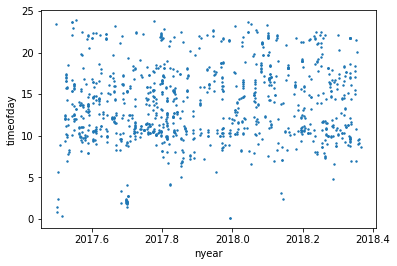

In [117]:
messages.plot.scatter('nyear', 'timeofday', s=2 );

<AxesSubplot:>

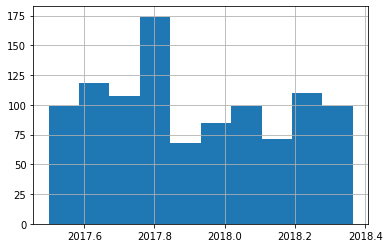

In [123]:
messages.nyear.hist()

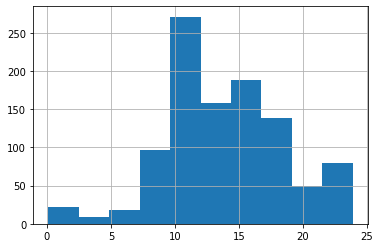

In [125]:
messages.timeofday.hist();

In [126]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

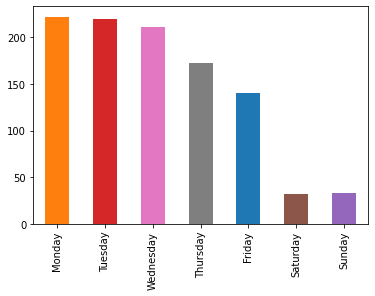

In [149]:
counts = messages.dayofweek.value_counts(sort=False)
color = {'C0', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7'}
counts.plot(kind='bar', color=color);

In [ ]:
# plot the distribution of messages by hour seperately by each day of the week in one frame

In [154]:
days = messages.dayofweek.cat.categories

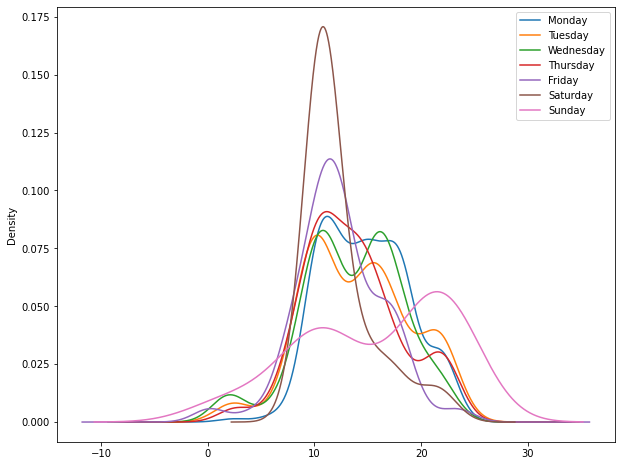

In [171]:
fig, ax = plt.subplots(figsize=(10, 8))
for day in days:
    messages[messages.dayofweek == day].timeofday.plot(kind='density');

plt.legend(days);

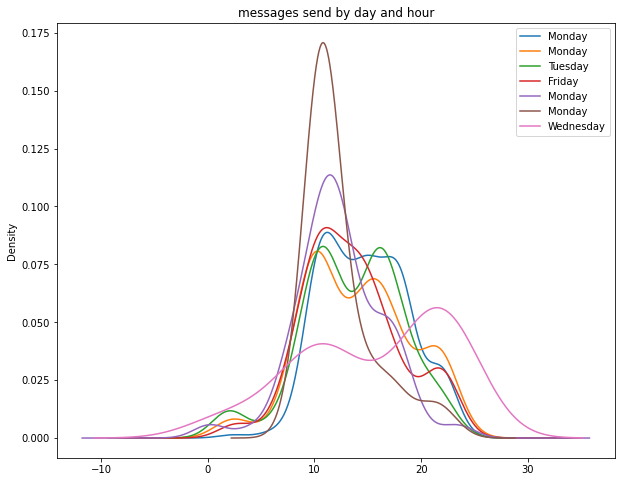

In [175]:
fig, ax = plt.subplots(figsize=(10, 8));
messages.groupby('dayofweek').timeofday.plot(kind='density');
plt.title('messages send by day and hour')
plt.legend(messages.dayofweek);